# Part 5 - Gaussian and Lorentzian Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('ZnO.xye')

def fig_setup(figsize=(10, 10)):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    return fig, ax

gaussian function takes parameters x = x data, a = amplitude, x0 = centre, and fwhm = full-width-half-maximum and returns an array of results from a gaussian function for each x value:

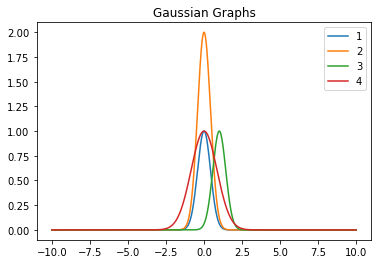

<Figure size 432x288 with 0 Axes>

In [2]:
def gaussian(x, a, x0, fwhm):
    c = fwhm / (2*((2*np.math.log(2, np.exp(1)))**(1/2)))
    y_gaussian = []
    for i in x:
        y = a*np.exp(-(i-x0)**2/(2*(c**2)))
        y_gaussian.append(y)
    y_gaussian = np.asarray(y_gaussian)
    return y_gaussian

x_data = np.arange(-10, 10, 0.01)

y1 = gaussian(x_data, 1, 0, 1)
y2 = gaussian(x_data, 2, 0, 1)
y3 = gaussian(x_data, 1, 1, 1)
y4 = gaussian(x_data, 1, 0, 2)

plt.plot(x_data, y1)
plt.plot(x_data, y2)
plt.plot(x_data, y3)
plt.plot(x_data, y4)
plt.title('Gaussian Graphs')
plt.legend([1, 2, 3, 4])
plt.show()
plt.clf()

lorentzian function takes parameters x = x data, a = amplitude, x0 = centre, and gam = full-width-half-maximum and returns an array of results from a lorentzian function for each x value:

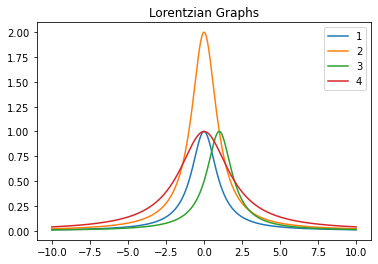

<Figure size 432x288 with 0 Axes>

In [3]:
def lorentzian(x, a, x0, gam):
    y_lorentzian = []
    for i in x:
        y = a * gam**2 / ( gam**2 + ( i - x0 )**2)
        y_lorentzian.append(y)
    y_lorentzian = np.asarray(y_lorentzian)
    return y_lorentzian

x_data = np.arange(-10, 10, 0.01)

y1 = lorentzian(x_data, 1, 0, 1)
y2 = lorentzian(x_data, 2, 0, 1)
y3 = lorentzian(x_data, 1, 1, 1)
y4 = lorentzian(x_data, 1, 0, 2)

plt.plot(x_data, y1)
plt.plot(x_data, y2)
plt.plot(x_data, y3)
plt.plot(x_data, y4)
plt.title('Lorentzian Graphs')
plt.legend([1, 2, 3, 4])
plt.show()
plt.clf()

estimation - estimates the amplitude, x-position and fwhm of the largest peak in the diffraction data:

In [4]:
def estimation(data, peak_width=1.0):
    max_index = np.argmax(data[:,1])          # index where y is maximum
    x_position = data[:,0][max_index]
    
    peak_start_x = data[:,0][max_index] - (peak_width/2)
    peak_end_x = data[:,0][max_index] + (peak_width/2)
    
    peak_start_i = np.searchsorted(data[:,0], peak_start_x)
    peak_end_i = np.searchsorted(data[:,0], peak_end_x)
    
    y_lower = data[:,1][peak_start_i:(max_index + 1)]
    y_upper = data[:,1][max_index:(peak_end_i + 1)]
    
    amplitude = max(data[:,1])                # max y value (height of peak)
    half_amp = amplitude/2                    # half height of peak
    
    index_1 = np.searchsorted(y_lower, half_amp)
    index_2 = np.searchsorted(y_upper, half_amp)

    x_range = data[:,0][peak_start_i:(peak_end_i+1)]
    
    x_pos_1 = x_range[index_1]                # x values at each index of half amplitude
    x_pos_2 = x_range[index_2]
        
    FWHM = x_pos_1 - x_pos_2                  # difference between x values at half amplitude
    return amplitude, x_position, FWHM

Plotting the tallest peak in the diffraction pattern with its lorentzian fit using the estimates from the estimation function:

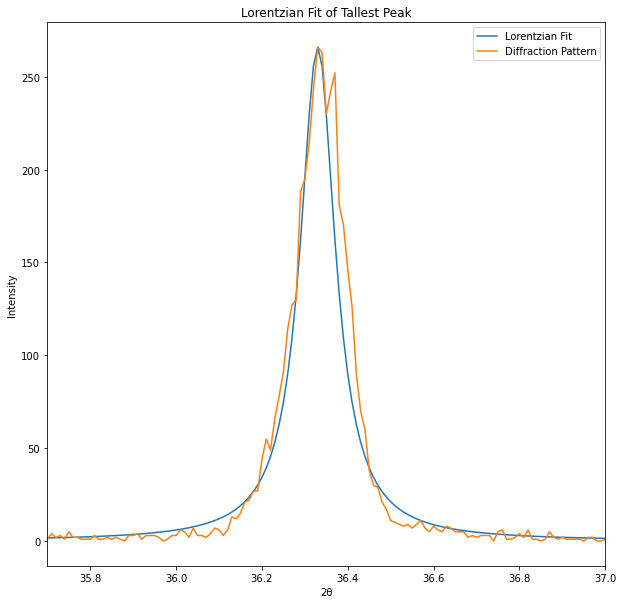

<Figure size 432x288 with 0 Axes>

In [5]:
fig, ax = fig_setup() 

y_lorent = lorentzian(data[:,0], estimation(data)[0], estimation(data)[1], estimation(data)[2])
plt.plot(data[:,0], y_lorent)
plt.plot(data[:,0], data[:,1])
ax.set_xlim(35.7, 37)
plt.title('Lorentzian Fit of Tallest Peak')
plt.xlabel('2θ')
plt.ylabel('Intensity')
plt.legend(['Lorentzian Fit', 'Diffraction Pattern'])
plt.show()
plt.clf()

Plotting the tallest peak in the diffraction pattern with its gaussian fit using the estimates from the estimation function:

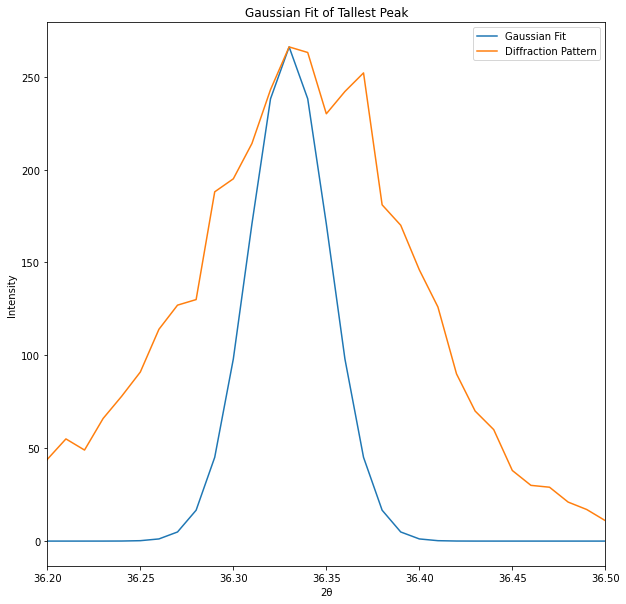

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = fig_setup()

y_gauss = gaussian(data[:,0], estimation(data)[0], estimation(data)[1], estimation(data)[2])
plt.plot(data[:,0], y_gauss)
plt.plot(data[:,0], data[:,1])
ax.set_xlim(36.2, 36.5)
plt.title('Gaussian Fit of Tallest Peak')
plt.xlabel('2θ')
plt.ylabel('Intensity')
plt.legend(['Gaussian Fit', 'Diffraction Pattern'])
plt.show()
plt.clf()

Linear background function taken from Part 2b:

In [7]:
def lnr_bgd(data, xmin=data[:,0][0], xmax=data[:,0][len(data[:,0])-1], width=1.5, peak_width=1.0):
    index_xmin = np.searchsorted(data[:,0], xmin)
    index_xmax = np.searchsorted(data[:,0], xmax)
    
    sliced_data_x = data[:,0][index_xmin:(index_xmax + 1)]
    sliced_data_y = data[:,1][index_xmin:(index_xmax + 1)]
    
    max_index = np.argmax(sliced_data_y)
    
    lower_bound_x = sliced_data_x[max_index] - (width/2)
    upper_bound_x = sliced_data_x[max_index] + (width/2)
    
    lower_bound_i = np.searchsorted(sliced_data_x, lower_bound_x)
    upper_bound_i = np.searchsorted(sliced_data_x, upper_bound_x)
    
    peak_start_x = sliced_data_x[max_index] - (peak_width/2)
    peak_end_x = sliced_data_x[max_index] + (peak_width/2)
    
    peak_start_i = np.searchsorted(sliced_data_x, peak_start_x)
    peak_end_i = np.searchsorted(sliced_data_x, peak_end_x)
    
    x_lower = sliced_data_x[lower_bound_i:(peak_start_i + 1)]
    x_upper = sliced_data_x[peak_end_i:(upper_bound_i + 1)]
    
    y_lower = sliced_data_y[lower_bound_i:(peak_start_i + 1)]
    y_upper = sliced_data_y[peak_end_i:(upper_bound_i + 1)]
    
    combined_x = np.concatenate((x_lower, x_upper))
    combined_y = np.concatenate((y_lower, y_upper))
    
    nan_indexes = []                             # indicies of not null values
    for i in range(0, len(combined_y), 1):
        if np.isnan(combined_y[i]) == False:
            nan_indexes.append(i)
    
    clean_x = []                                 # x data without null values
    for i in nan_indexes:
        clean_x.append(combined_x[i])
    
    clean_y = combined_y[np.logical_not(np.isnan(combined_y))]    # y data without null values
    
    counter = 0
    for i in clean_x:
        if np.isfinite(i) == False:
            counter += 1
    #print(counter)
    
    coef = np.polyfit(clean_x, clean_y, 1)
    y_line = coef[1] + coef[0] * pow(data[:,0], 1)
    
    #plt.plot(data[:,0], data[:,1])
    #plt.plot(data[:,0], y_line, 'r')
    #ax.set_xlim(data[:,0][index_xmin], data[:,0][index_xmax])
    #plt.legend(['Diffraction Data', 'Linear Background'])
    #plt.xlabel('2θ')
    #plt.ylabel('Intensity')
    #plt.title('Diffraction Pattern')
    #plt.show()
    #plt.clf()
    
    return y_line, peak_start_i, peak_end_i

linear_correction - estimates the amplitude, x-position, and fwhm of the largest peak corrected for a local linear background:

In [8]:
from sklearn.linear_model import LinearRegression

def linear_correction(data, width=1.0, peak_width=1.0):
    y_line = lnr_bgd(data, width = width, peak_width = peak_width)[0]
    
    max_index = np.argmax(data[:,1])          # index where y is maximum
    x_position = data[:,0][max_index]
    
    peak_start_x = data[:,0][max_index] - (peak_width/2)
    peak_end_x = data[:,0][max_index] + (peak_width/2)
    
    peak_start_i = np.searchsorted(data[:,0], peak_start_x)
    peak_end_i = np.searchsorted(data[:,0], peak_end_x)
    
    y_lower = data[:,1][peak_start_i:(max_index + 1)]
    y_upper = data[:,1][max_index:(peak_end_i + 1)]
    
    amplitude = data[:,1][max_index] - y_line[max_index]               # max y value (height of peak)
    half_amp = amplitude/2            # half height peak
    
    index_1 = np.searchsorted(y_lower, half_amp)
    index_2 = np.searchsorted(y_upper, half_amp)

    x_range = data[:,0][peak_start_i:(peak_end_i+1)]
    
    x_pos_1 = x_range[index_1]                           # x values at each index of half amplitude
    x_pos_2 = x_range[index_2]
        
    FWHM = x_pos_1 - x_pos_2            # difference between x values at half amplitude
    return amplitude, x_position, FWHM

Plotting the tallest peak in the diffraction pattern with its lorentzian fit using the estimates from the linear_correction function:

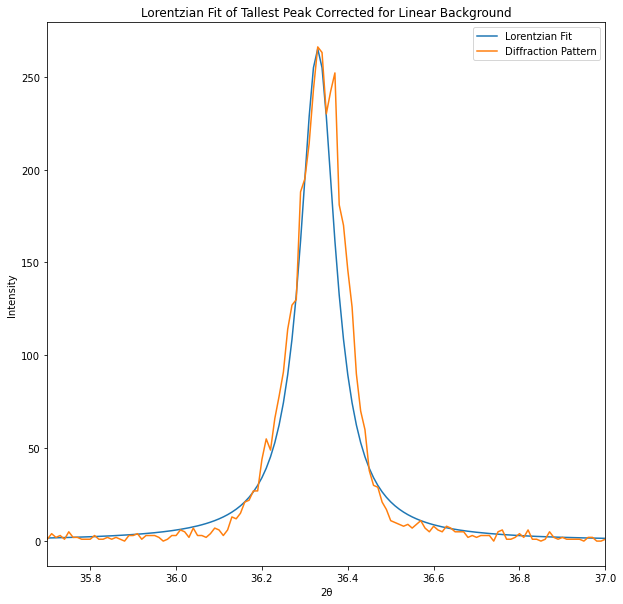

<Figure size 432x288 with 0 Axes>

In [9]:
fig, ax = fig_setup() 

y_lorent = lorentzian(data[:,0], linear_correction(data)[0], linear_correction(data)[1], linear_correction(data)[2])
plt.plot(data[:,0], y_lorent)
plt.plot(data[:,0], data[:,1])
ax.set_xlim(35.7, 37)
plt.title('Lorentzian Fit of Tallest Peak Corrected for Linear Background')
plt.xlabel('2θ')
plt.ylabel('Intensity')
plt.legend(['Lorentzian Fit', 'Diffraction Pattern'])
plt.show()
plt.clf()

Plotting the tallest peak in the diffraction pattern with its gaussian fit using the estimates from the linear_correction function:

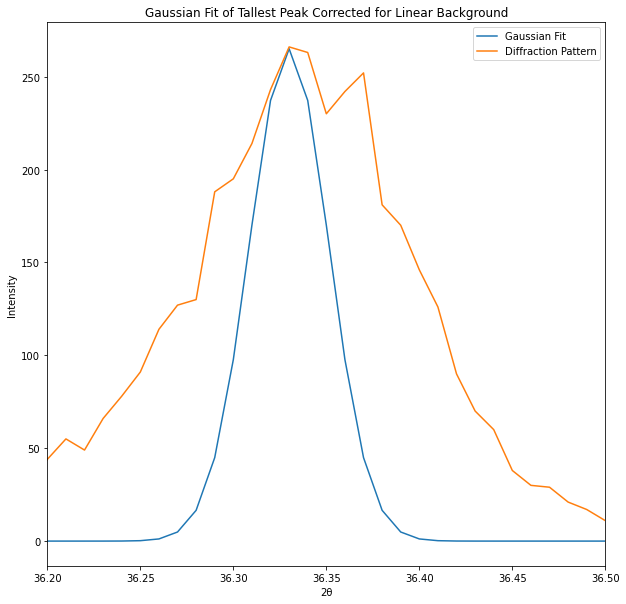

<Figure size 432x288 with 0 Axes>

In [12]:
fig, ax = fig_setup()

y_gauss = gaussian(data[:,0], linear_correction(data)[0], linear_correction(data)[1], linear_correction(data)[2])
plt.plot(data[:,0], y_gauss)
plt.plot(data[:,0], data[:,1])
ax.set_xlim(36.2, 36.5)
plt.title('Gaussian Fit of Tallest Peak Corrected for Linear Background')
plt.xlabel('2θ')
plt.ylabel('Intensity')
plt.legend(['Gaussian Fit', 'Diffraction Pattern'])
plt.show()
plt.clf()

sum_sq_residuals function calculates the sum of the squares of the residuals between the diffraction data and the calculated gaussian and lorentzian fits:

In [14]:
def sum_sq_residuals(data):
    y_lorent = lorentzian(data[:,0], linear_correction(data)[0], linear_correction(data)[1], linear_correction(data)[2])
    sum_lorent = 0
    index_lorent = 0
    for each in data[:,1]:
        sum_lorent += ((each - y_lorent[index_lorent])**2)
        index_lorent += 1
    
    y_gauss = gaussian(data[:,0], linear_correction(data)[0], linear_correction(data)[1], linear_correction(data)[2])
    sum_gauss = 0
    index_gauss = 0
    for each in data[:,1]:
        sum_gauss += ((each - y_gauss[index_gauss])**2)  
        index_gauss += 1
  
    return sum_lorent, sum_gauss

print('Sum of the squares of the residuals for the lorentzian function is: ' + str(sum_sq_residuals(data)[0]))
print('Sum of the squares of the residuals for the lorentzian function is: ' + str(sum_sq_residuals(data)[1]))

Sum of the squares of the residuals for the lorentzian function is: 1710705.072074382
Sum of the squares of the residuals for the lorentzian function is: 1966977.874684155


fit function fits the largest peak to either a Gaussian or a Lorentzian and returns the best fits for a, x0 and fwhm:

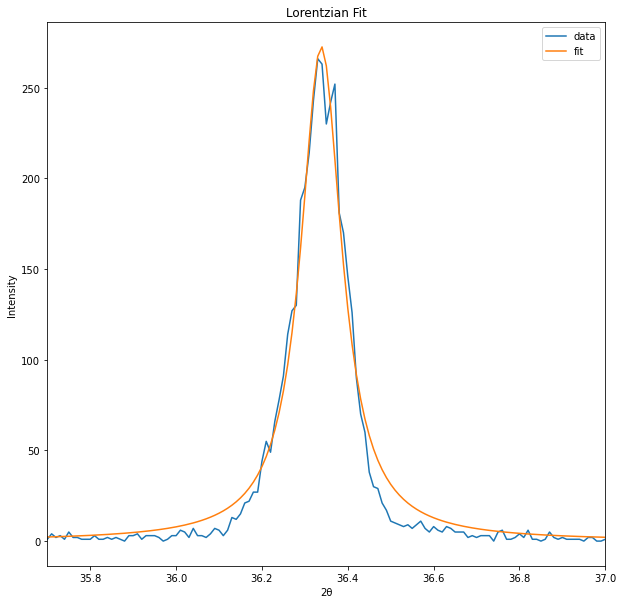

(272.7422790013984, 36.33825982469096, -0.05822835388616448)

<Figure size 432x288 with 0 Axes>

In [15]:
from scipy.optimize import curve_fit

def fit(data): 
    if sum_sq_residuals(data)[0] < sum_sq_residuals(data)[1]:
        # lorentzian fits best
        p0 = [linear_correction(data)[0], linear_correction(data)[1], linear_correction(data)[2]]
        parameters, covariance = curve_fit(lorentzian, data[:,0], data[:,1], p0=p0)
  
        fit_A = parameters[0]
        fit_B = parameters[1]
        fit_C = parameters[2]
  
        fit_y = lorentzian(data[:,0], fit_A, fit_B, fit_C)
    
        fig, ax = fig_setup()
        plt.plot(data[:,0], data[:,1], label='data')
        plt.plot(data[:,0], fit_y, label='fit')
        ax.set_xlim(35.7, 37)
        plt.title('Lorentzian Fit')
        plt.xlabel('2θ')
        plt.ylabel('Intensity')
        plt.legend()
        plt.show()
        plt.clf()
        
    elif sum_sq_residuals(data)[0] == sum_sq_residuals(data)[1]:
        print('lorentzian and gaussian fit equally well')
        
    else:
        # gaussian fits best
        p0 = [linear_correction(data)[0], linear_correction(data)[1], linear_correction(data)[2]]
        parameters, covariance = curve_fit(gaussian, data[:,0], data[:,1], p0=p0)
  
        fit_A = parameters[0]
        fit_B = parameters[1]
        fit_C = parameters[2]

        fit_y = gaussian(data[:,0], fit_A, fit_B, fit_C)
        
        fig, ax = fig_setup()
        plt.plot(data[:,0], data[:,1], label='data')
        plt.plot(data[:,0], fit_y, label='fit')
        ax.set_xlim(35.7, 37)
        plt.title('Gaussian Fit')
        plt.xlabel('2θ')
        plt.ylabel('Intensity')
        plt.legend()
        plt.show()
        plt.clf()
        
    return fit_A, fit_B, fit_C
        
        
fit(data)        